In [162]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as ccrs

## Read Matlab CALIOP data

In [163]:
# Read Climatology
data = sio.loadmat('/Users/laaq/Documents/MATLAB/SOCCOM/Lidar_anomalies/lidarclim.mat')
#data['lidarclim'][('lat')][0,11][64,359] access the deepest data level
lidarclim = data['lidarclim']
# Read annually- and monthly-resolved data
data = sio.loadmat('/Users/laaq/Documents/MATLAB/SOCCOM/Lidar_anomalies/lidar_annual.mat')
#lidar_annual[('data')][0,1][('lat')][0,11][64,359] access the deepest data level
lidar_annual = data['lidar_annual']

## Re-process data

In [164]:
# Define variables
lidar_anomaly_bbp = np.zeros((65,360,12,12))
lidar_anomaly_bbp[:] = np.nan
lidar_anomaly_cphyto = np.zeros((65,360,12,12))
lidar_anomaly_cphyto[:] = np.nan
lidar_lat = np.zeros((65,360,12,12))
lidar_lat[:] = np.nan
lidar_lon = np.zeros((65,360,12,12))
lidar_lon[:] = np.nan
lidar_bbp= np.zeros((65,360,12,12))
lidar_bbp[:] = np.nan
lidar_cphyto= np.zeros((65,360,12,12))
lidar_cphyto[:] = np.nan
lidar_numobs = np.zeros((65,360,12,12))
lidar_numobs[:] = np.nan
lidar_month = np.zeros((65,360,12,12))
lidar_month[:] = np.nan
lidar_year = np.zeros((65,360,12,12))
lidar_year[:] = np.nan

In [165]:
# Re-store data as 4D array
for m in range(12):
    for n in range(12):
        lidar_anomaly_bbp[:,:,m,n] = lidar_annual[('data')][0,m][('bbp')][0,n] - lidarclim['bbp'][0,n]
        lidar_anomaly_cphyto[:,:,m,n] = lidar_annual[('data')][0,m][('cphyto')][0,n] - lidarclim['cphyto'][0,n]
        lidar_lat[:,:,m,n] = lidar_annual[('data')][0,m][('lat')][0,n]
        lidar_lon[:,:,m,n] = lidar_annual[('data')][0,m][('lon')][0,n]
        lidar_bbp[:,:,m,n] = lidar_annual[('data')][0,m][('bbp')][0,n]
        lidar_cphyto[:,:,m,n] = lidar_annual[('data')][0,m][('cphyto')][0,n]
        lidar_numobs[:,:,m,n] = lidar_annual[('data')][0,m][('numobs')][0,n]
        lidar_month[:,:,m,n] = lidar_annual[('data')][0,m][('month')][0,n]
        lidar_year[:,:,m,n] = lidar_annual[('year')][0,m]

In [166]:
# Reshape data
lidar_anomaly_bbp = np.reshape(lidar_anomaly_bbp, (65,360,144))
lidar_anomaly_cphyto = np.reshape(lidar_anomaly_cphyto, (65,360,144))
lidar_lat = np.reshape(lidar_lat, (65,360,144))
lidar_lon = np.reshape(lidar_lon, (65,360,144))
lidar_bbp = np.reshape(lidar_bbp, (65,360,144))
lidar_cphyto = np.reshape(lidar_cphyto, (65,360,144))
lidar_numobs = np.reshape(lidar_numobs, (65,360,144))
lidar_month = np.reshape(lidar_month, (65,360,144))
lidar_year = np.reshape(lidar_year, (65,360,144))

In [167]:
# Rotate and flip data
lidar_anomaly_bbp = np.flipud(np.rot90(lidar_anomaly_bbp,1))
lidar_anomaly_cphyto = np.flipud(np.rot90(lidar_anomaly_cphyto,1))
lidar_lat = np.flipud(np.rot90(lidar_lat,1))
lidar_lon = np.flipud(np.rot90(lidar_lon,1))
lidar_bbp = np.flipud(np.rot90(lidar_bbp,1))
lidar_cphyto = np.flipud(np.rot90(lidar_cphyto,1))
lidar_numobs = np.flipud(np.rot90(lidar_numobs,1))
lidar_month = np.flipud(np.rot90(lidar_month,1))
lidar_year = np.flipud(np.rot90(lidar_year,1))


/Users/laaq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


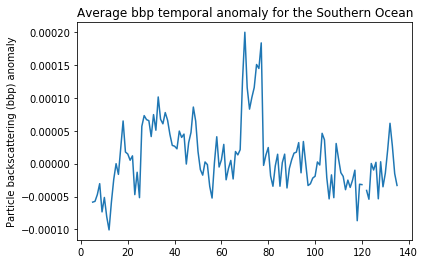

In [168]:
# Make monthly average to check with previous Matlab code
dummy = np.zeros(144)
for n in range(144):
    dummy[n] = np.nanmean(lidar_anomaly_bbp[:,:,n]) 
plt.plot(dummy)
plt.ylabel('Particle backscattering (bbp) anomaly')
plt.title('Average bbp temporal anomaly for the Southern Ocean')
plt.show()

In [169]:
# STORE LIDAR ARRAYS IN DICTIONARY
lidar_data = {}
lidar_data["lidar_anomaly_bbp"] = lidar_anomaly_bbp[:,:,5:-8]
lidar_data["lidar_anomaly_cphyto"] = lidar_anomaly_cphyto[:,:,5:-8]
lidar_data["lidar_lat"] = lidar_lat[:,:,5:-8]
lidar_data["lidar_lon"] = lidar_lon[:,:,5:-8]
lidar_data["lidar_bbp"] = lidar_bbp[:,:,5:-8]
lidar_data["lidar_cphyto"] = lidar_cphyto[:,:,5:-8]
lidar_data["lidar_numobs"] = lidar_numobs[:,:,5:-8]
lidar_data["lidar_month"] = lidar_month[:,:,5:-8]
lidar_data["lidar_year"] = lidar_year[:,:,5:-8]

## Load SST anomaly data 

In [170]:
# Load Alex SST data
sst_data = sio.loadmat('/Users/laaq/Documents/MATLAB/SOCCOM/Lidar_anomalies/sst_satellite_200606-201704.mat')

# Compute correlation
r = np.zeros((360,65))
r[:] = np.nan
for x in range(360):
    for y in range(65):
        A = lidar_data['lidar_anomaly_bbp'][x,y,:]
        B = sst_data['sst_anom'][x,y,:]
        matrix = np.stack((A,B),1)
        df = pd.DataFrame(matrix, columns = ['A','B'])
        rs = df.corr()
        r[x,y] = rs['A'][1]
                

<Figure size 432x288 with 0 Axes>

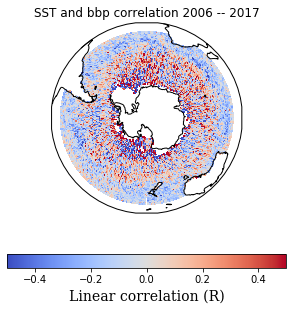

In [153]:
lon = sst_data['lon']
lat = sst_data['lat']
plt.set_cmap('coolwarm')
data_trans =  ccrs.PlateCarree()
fig = plt.figure(figsize=(5,5),facecolor='w')
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0,central_latitude=-90.0))
#ax.set_extent([-180, 180, -90, -25.5], crs=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, -25.5], crs=ccrs.PlateCarree())
ax.coastlines()
pp = ax.pcolormesh(lon, lat, r, transform=data_trans,vmin=-0.5, vmax=0.5)
cbar = plt.colorbar(pp, orientation='horizontal')
cbar.set_label(label='Linear correlation (R)',size=14, family='serif')
ax.set_title('SST and bbp correlation 2006 -- 2017')
plt.show()

## Calculate average bbp anomaly time series north and south of 55${^\circ}$S

In [171]:
mask_north = np.zeros((sst_data['sst_anom'].shape))
lat_idx = np.where(np.dstack([sst_data['lat']]*131) > - 55)
mask_north[lat_idx] = 1

mask_south = np.zeros((sst_data['sst_anom'].shape))
lat_idx = np.where(np.dstack([sst_data['lat']]*131) < - 55)
mask_south[lat_idx] = 1
gridarea = np.dstack([sst_data['gridarea']]*131)

bbp_north = np.squeeze(np.nansum(np.nansum(lidar_data['lidar_anomaly_bbp'] * mask_north * gridarea, axis = 0), axis = 0) \
                       / np.nansum(np.nansum(gridarea *mask_north, axis = 0), axis = 0))

bbp_south = np.squeeze(np.nansum(np.nansum(lidar_data['lidar_anomaly_bbp'] * mask_south * gridarea, axis = 0), axis = 0) \
                       / np.nansum(np.nansum(gridarea *mask_south, axis = 0), axis = 0))

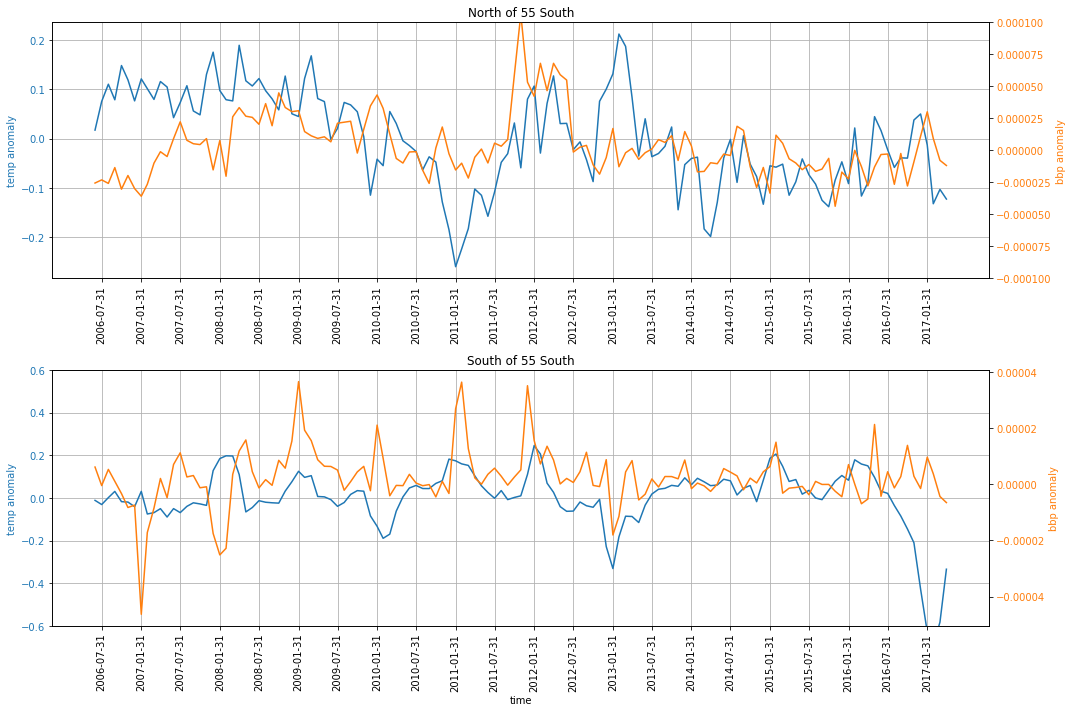

In [137]:
# Plotting Time Series
date_py = pd.date_range(start='6/15/2006', periods=131, freq='M') # Dates time-series
date_py = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in date_py]

fig, (ax1, ax3) = plt.subplots(2,1,figsize=(15,10))
color = 'tab:blue'
ax1.set_ylabel('temp anomaly', color=color)
ax1.plot(date_py, sst_data['sst_north'] * -1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(date_py[1:-1:6])
ax1.set_xticklabels(date_py[1:-1:6],rotation=90)
ax1.grid(axis="both")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('bbp anomaly', color=color)  # we already handled the x-label with ax1
ax2.plot(date_py, bbp_north, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(date_py[1:-1:6])
ax2.set_xticklabels(date_py[1:-1:6],rotation=90)
ax2.set_title('North of 55 South')
ax2.set_ylim(-1e-4,1e-4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

color = 'tab:blue'
ax3.set_xlabel('time')
ax3.set_ylabel('temp anomaly', color=color)
ax3.plot(date_py, sst_data['sst_south'] * -1, color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_xticks(date_py[1:-1:6])
ax3.set_xticklabels(date_py[1:-1:6],rotation=90)
ax3.set_ylim(-0.6,0.6)
ax3.grid(axis="both")
ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax4.set_ylabel('bbp anomaly', color=color)  # we already handled the x-label with ax1
ax4.plot(date_py, bbp_south, color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_xticks(date_py[1:-1:6])
ax4.set_xticklabels(date_py[1:-1:6],rotation=90)
ax4.set_title('South of 55 South')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

date_py = pd.date_range(start='6/15/2006', periods=131, freq='M') # Dates time-series

## 12 month rolling window correlation

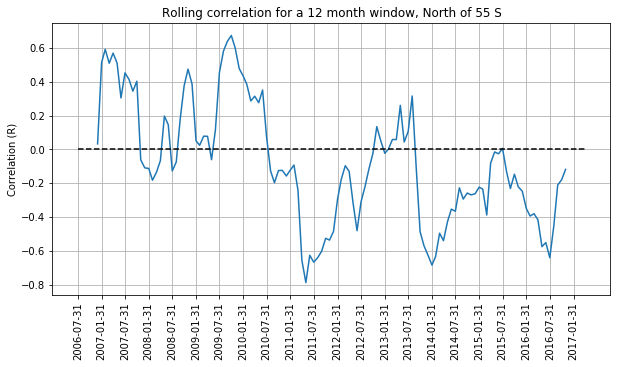

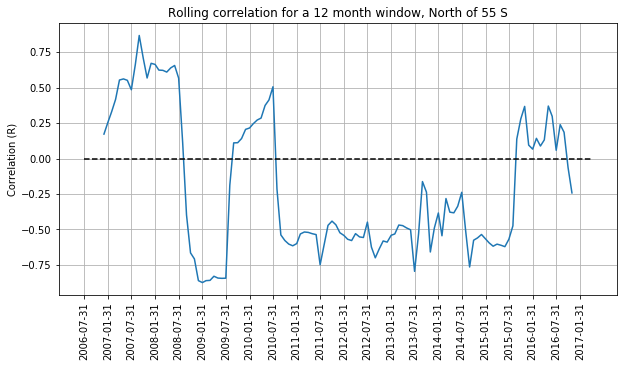

In [174]:
# Rolling window correlation of the entire time series
A = np.squeeze(sst_data['sst_north'])
B = np.squeeze(sst_data['sst_south'])
matrix = np.stack((A,B,bbp_north,bbp_south),1)
date_py = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in date_py]
df = pd.DataFrame(matrix, index = date_py, columns = ['sst_north','sst_south','bbp_north','bbp_south'])
rolling_r_north = df['sst_north'].rolling(12, center = True).corr(df['bbp_north'])
rolling_r_south = df['sst_south'].rolling(12, center = True).corr(df['bbp_south'])
fig = plt.figure(figsize = (10,5))
plt.plot(date_py,rolling_r_north)
plt.plot([date_py[1],date_py[-1]],[0,0],color = 'black', linestyle = '--')
plt.ylabel('Correlation (R)')
plt.grid('both')
plt.xticks(date_py[1:-1:6],rotation=90)
plt.title('Rolling correlation for a 12 month window, North of 55 S')
plt.show()
fig = plt.figure(figsize = (10,5))
plt.plot(date_py,rolling_r_south)
plt.plot([date_py[1],date_py[-1]],[0,0],color = 'black', linestyle = '--')
plt.ylabel('Correlation (R)')
plt.grid('both')
plt.xticks(date_py[1:-1:6],rotation=90)
plt.title('Rolling correlation for a 12 month window, North of 55 S')
plt.show()

In [175]:
# Rolling window correlation of the entire time series varying the window
rolling_r_north_matrix = np.zeros((27,131))
rolling_r_north_matrix[:] = np.nan
rolling_r_south_matrix = np.zeros((27,131))
rolling_r_south_matrix[:] = np.nan
for n in range(27):
    rolling_r_north_matrix[n,:] = df['sst_north'].rolling(n+3, center = True).corr(df['bbp_north'])
    rolling_r_south_matrix[n,:] = df['sst_south'].rolling(n+3, center = True).corr(df['bbp_south'])
rs_north = pd.DataFrame(rolling_r_north_matrix)    
rs_south = pd.DataFrame(rolling_r_south_matrix)   

# Variable rolling window correlation between 3 and 10 weeks

Text(0.5, 1, 'R^2')

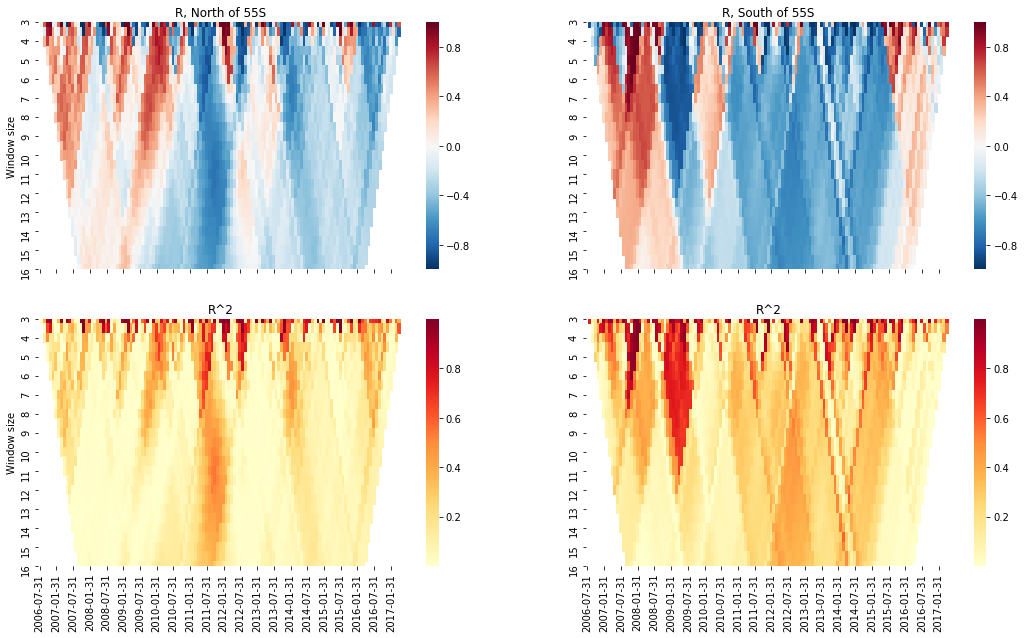

In [176]:
# R
f,([ax,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(18,10))
sns.heatmap(rs_north ,cmap='RdBu_r',ax=ax, xticklabels=6)
ax.set_xticklabels([])
ax.set_yticklabels(list(range(3,30)))
ax.set_title('R, North of 55S')
ax.set_ylabel('Window size')
sns.heatmap(rs_south,cmap='RdBu_r',ax=ax2, xticklabels=6)
ax2.set_xticklabels([])
ax2.set_yticklabels(list(range(3,30)))
ax2.set_title('R, South of 55S')
#R2
sns.heatmap(rs_north**2,cmap='YlOrRd',ax=ax3, xticklabels=6)
ax3.set_xticklabels(date_py[1:-1:6],rotation=90)
ax3.set_yticklabels(list(range(3,30)))
ax3.set_title('R^2')
ax3.set_ylabel('Window size')
ax4.set_xticklabels(date_py[1:-1:6],rotation=90)
sns.heatmap(rs_south**2,cmap='YlOrRd',ax=ax4, xticklabels=6)
ax4.set_xticklabels(date_py[1:-1:6],rotation=90)
ax4.set_yticklabels(list(range(3,30)))
ax4.set_title('R^2')

## Time lagged cross correlation of the entire time seres (i.e., no windows) 

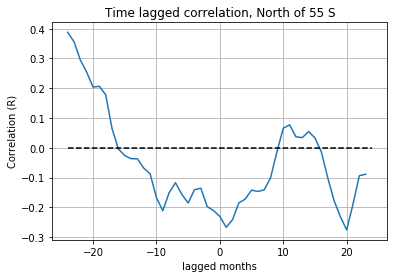

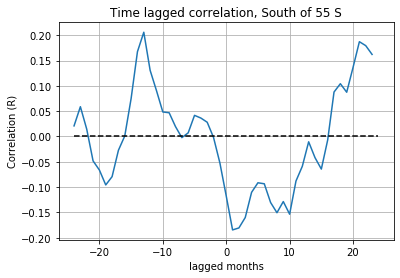

In [143]:
datax = df['bbp_north']
datay = df['sst_north']
lagslist = list(range(-24, 24))
rs = np.zeros((len(lagslist)))
rs[:] = np.nan
for n in range(len(lagslist)):
    lag = lagslist[n]
    rs[n] = datax.corr(datay.shift(lag))
plt.plot(lagslist,rs)
plt.plot([-24,24],[0,0],color = 'black', linestyle = '--')
plt.title('Time lagged correlation, North of 55 S')
plt.ylabel('Correlation (R)')
plt.xlabel('lagged months')
plt.grid('both')
plt.show()

datax = df['bbp_south']
datay = df['sst_south']
lagslist = list(range(-24, 24))
rs = np.zeros((len(lagslist)))
rs[:] = np.nan
for n in range(len(lagslist)):
    lag = lagslist[n]
    rs[n] = datax.corr(datay.shift(lag))
plt.plot(lagslist,rs)
plt.plot([-24,24],[0,0],color = 'black', linestyle = '--')
plt.title('Time lagged correlation, South of 55 S')
plt.ylabel('Correlation (R)')
plt.xlabel('lagged months')
plt.grid('both')
plt.show()